<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-project-sandbox/blob/main/Seoul_Bike_sharing_demand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LinearRegression

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

Data from: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [191]:
cols = ["date", "bike_count", "hour", "temperature", "humidity", "wind_speed", "visibility_on_10m", "dew_point_temperature", "solar_radiation", "rainfall_mm", "snowfall_cm", "seasons", "holiday", "functioning_day"]
df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1', names=cols, skiprows=1)
df.sample(10)

,date,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day
2446,12/03/2018,695,22,7.8,49,0.1,528,-2.2,0.00,0.0,0.0,Spring,No Holiday,Yes
591,25/12/2017,319,15,0.4,28,2.5,2000,-16.0,0.90,0.0,0.0,Winter,Holiday,Yes
8487,19/11/2018,839,15,11.1,35,1.9,861,-3.8,1.11,0.0,0.0,Autumn,No Holiday,Yes
2957,03/04/2018,163,5,16.9,73,1.6,1275,12.0,0.00,0.0,0.0,Spring,No Holiday,Yes
5308,10/07/2018,133,4,20.6,97,0.5,1989,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4183,24/05/2018,1390,7,12.5,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
1057,14/01/2018,150,1,-3.7,79,0.9,438,-6.8,0.00,0.0,0.0,Winter,No Holiday,Yes
7703,17/10/2018,896,23,9.7,56,0.7,2000,1.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
5213,06/07/2018,311,5,22.5,66,1.5,2000,15.8,0.00,0.0,0.0,Summer,No Holiday,Yes
6958,16/09/2018,988,22,21.4,87,2.4,540,19.1,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [192]:
df.drop(['seasons', 'holiday', 'date'], axis=1, inplace=True)

In [193]:
df.sample(n=10)

,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
6167,1165,23,30.3,65,0.4,2000,22.9,0.00,0.0,0.0,Yes
3548,1499,20,16.9,41,3.1,1060,3.5,0.00,0.0,0.0,Yes
3790,1336,22,18.6,69,1.7,1047,12.7,0.00,0.0,0.0,Yes
5830,1613,22,31.6,66,3.0,2000,24.4,0.00,0.0,0.0,Yes
2896,1578,16,18.0,32,3.0,1836,1.0,1.03,0.0,0.0,Yes
4353,1277,9,18.8,59,1.6,1233,10.6,1.90,0.0,0.0,Yes
1944,177,0,0.0,75,2.3,394,-3.9,0.00,0.0,0.0,Yes
4898,818,2,22.3,37,1.8,2000,6.8,0.00,0.0,0.0,Yes
7981,815,13,10.4,49,2.7,2000,0.1,0.54,0.0,0.0,Yes
3497,1878,17,22.9,23,2.8,1985,0.6,1.64,0.0,0.0,Yes


In [194]:
df.temperature[df.temperature >= 0].count()

7327

In [195]:
df.functioning_day = df.functioning_day.map({'Yes': 1, 'No': 0}).astype(int)

In [196]:
df = df[df.hour == 12]
df.drop(columns=['hour'], axis=1, inplace=True)

In [197]:
df

,bike_count,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


In [198]:
for i in range(len(df.columns)):
  print(f"Column [{i}] name: {df.columns[i]}")



Column [0] name: bike_count
Column [1] name: temperature
Column [2] name: humidity
Column [3] name: wind_speed
Column [4] name: visibility_on_10m
Column [5] name: dew_point_temperature
Column [6] name: solar_radiation
Column [7] name: rainfall_mm
Column [8] name: snowfall_cm
Column [9] name: functioning_day


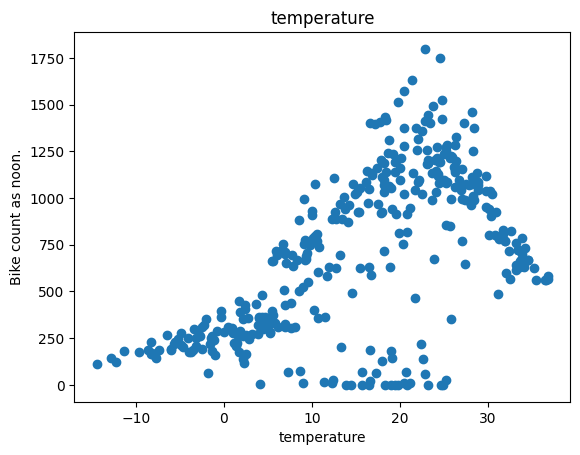

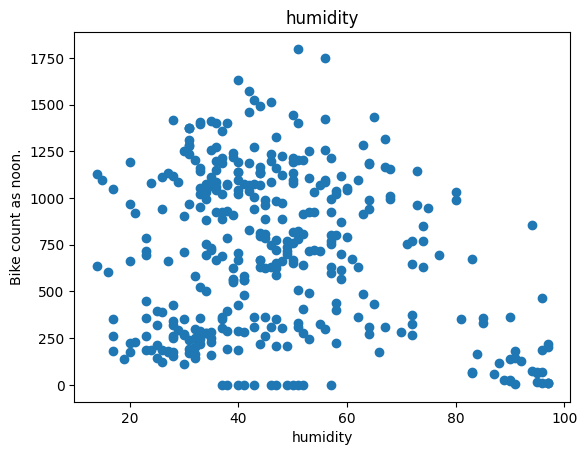

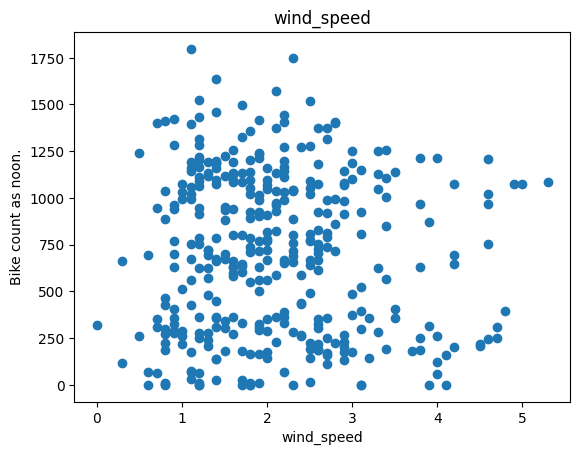

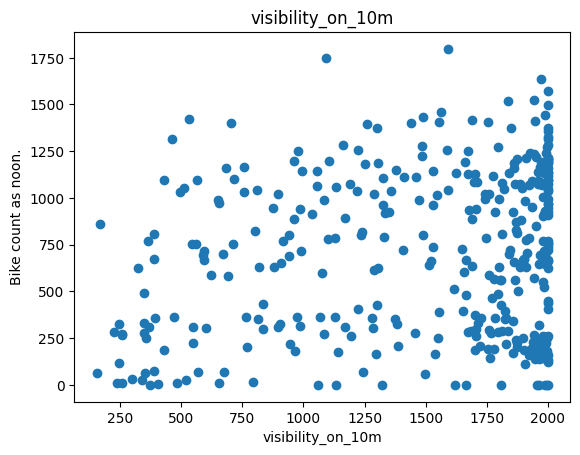

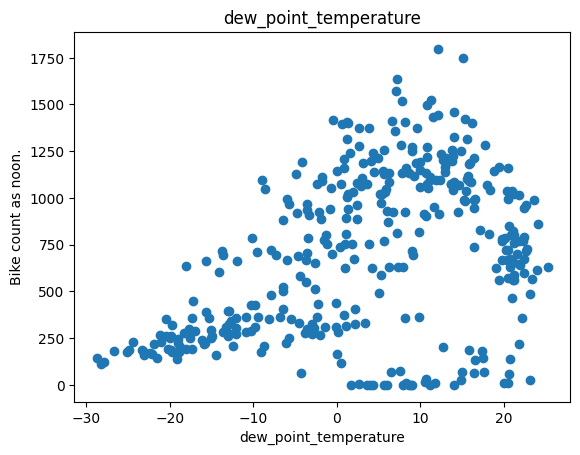

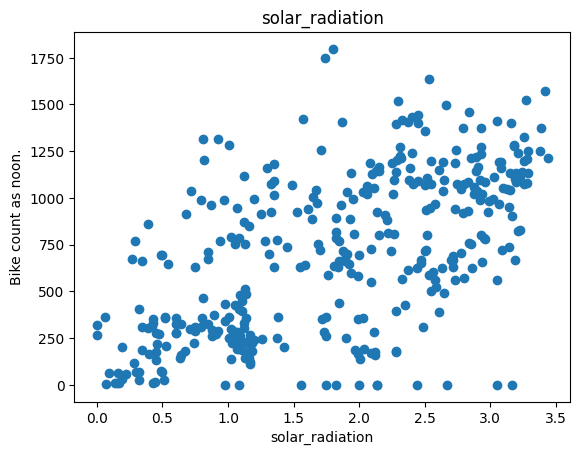

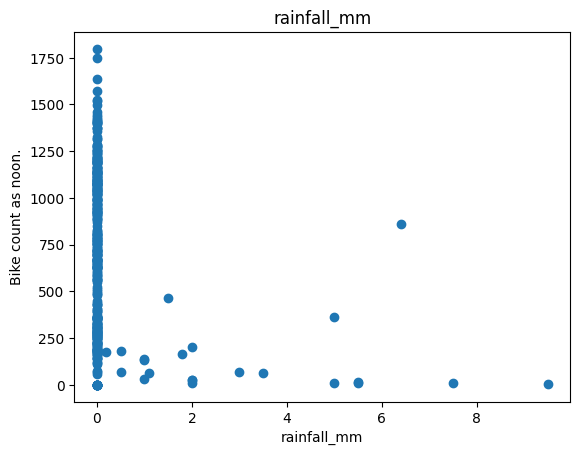

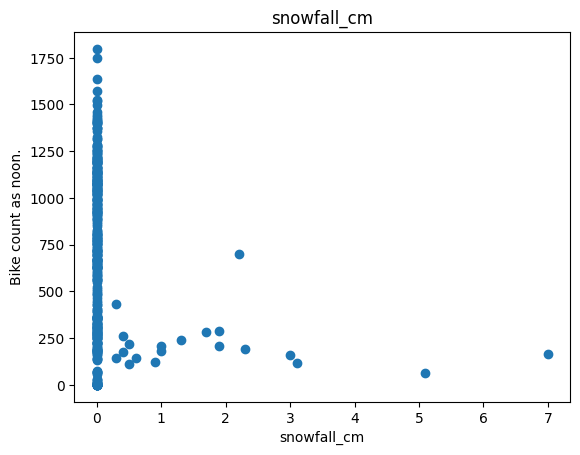

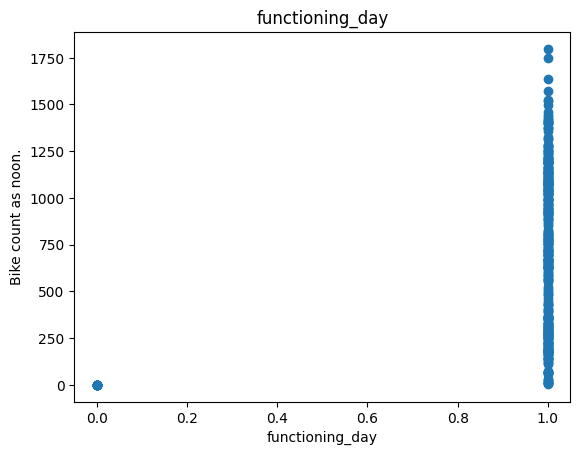

In [199]:
for label in df.columns[1:]:
  plt.scatter(df[label], df.bike_count)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike count as noon.')
  # plt.legend()
  plt.show()

In [200]:
df.drop(columns=["wind_speed", "visibility_on_10m", "functioning_day"], axis=1, inplace=True)

In [201]:
df.sample(10)

,bike_count,temperature,humidity,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm
1956,356,4.0,23,-15.3,2.03,0.0,0.0
6060,721,33.4,47,20.5,2.51,0.0,0.0
3252,1105,12.5,53,3.1,2.52,0.0,0.0
8244,0,13.9,50,3.6,2.14,0.0,0.0
3708,1206,17.9,32,0.9,3.28,0.0,0.0
828,290,-2.9,33,-16.9,0.92,0.0,0.0
5316,1035,24.1,80,20.4,0.72,0.0,0.0
5556,822,32.6,51,21.1,3.21,0.0,0.0
5004,1145,24.1,73,18.9,2.15,0.0,0.0
4620,1204,23.2,52,12.7,0.82,0.0,0.0


In [202]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [203]:
def get_xy(dataframe, y_label, x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y



In [204]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=["temperature"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_label=["temperature"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=["temperature"])


## LinearRegression

In [205]:
temp_regressor = LinearRegression()
temp_regressor.fit(X_train_temp, y_train_temp)

LinearRegression()

In [206]:
print(temp_regressor.coef_)
print(temp_regressor.intercept_)
print(temp_regressor.rank_)
print(temp_regressor.n_features_in_)

[[21.6671889]]
[361.53540812]
1
1


In [207]:
temp_regressor.score(X_train_temp, y_train_temp)

0.32542510574785966

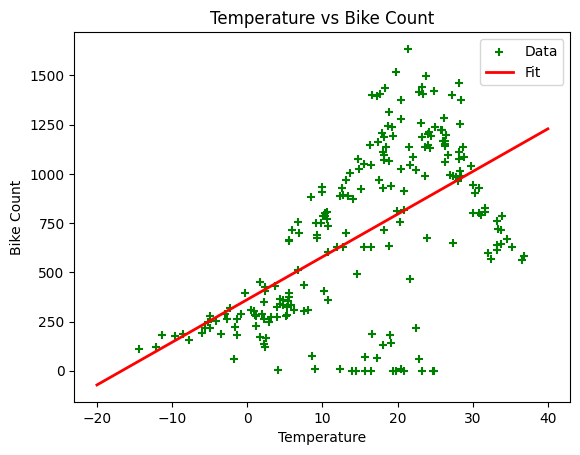

In [208]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [209]:
df.columns

Index(['bike_count', 'temperature', 'humidity', 'dew_point_temperature',
       'solar_radiation', 'rainfall_mm', 'snowfall_cm'],
      dtype='object')

## Multiple Linear Regression

In [210]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_label=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:])

In [211]:
all_regressor = LinearRegression()
all_regressor.fit(X_train_all, y_train_all)

LinearRegression()

In [212]:
print(all_regressor.coef_) # Shift + Alt for column edition
print(all_regressor.intercept_)
print(all_regressor.rank_)
print(all_regressor.n_features_in_)

[[  3.15890048 -10.81176642  18.35310682  54.50573227 -20.39913978
    0.46023591]]
[994.13313044]
6
6


In [213]:
all_regressor.score(X_train_all, y_train_all)

0.4693784186541857

## Regression with Neural Network

In [214]:
def plot_loss(history) -> None:
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [215]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [216]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(units=1)
    ]
) # 1 node - by default linear

In [217]:
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError(),
)

In [218]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1),
    y_train_temp,
    epochs=1000,
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

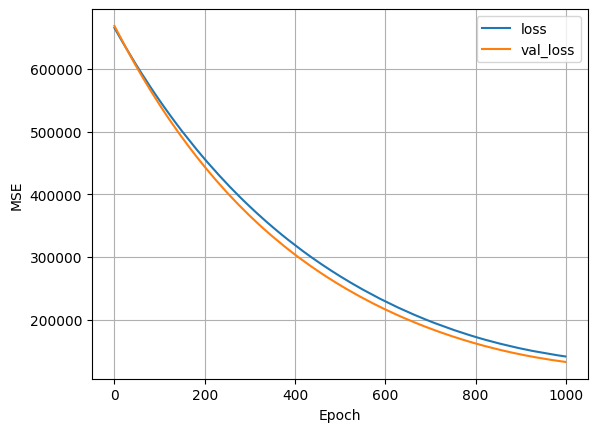

In [219]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


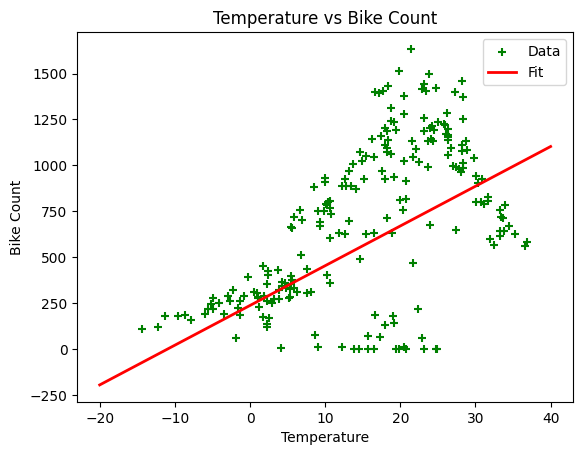

In [220]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

# Multi-layer neural network

In [221]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1),
    ]
)
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
)

In [222]:
history = nn_model.fit(
    X_train_temp,
    y_train_temp,
    epochs=100,
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

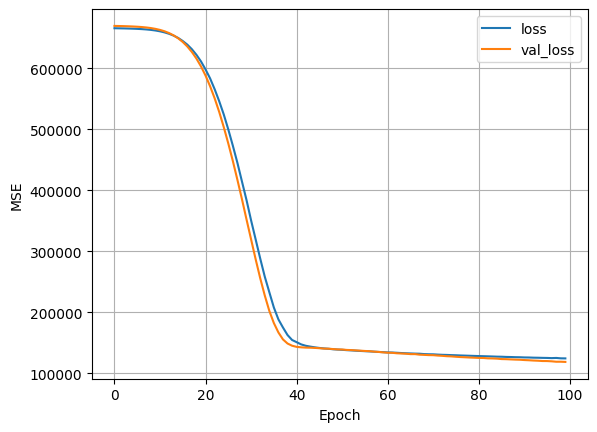

In [223]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


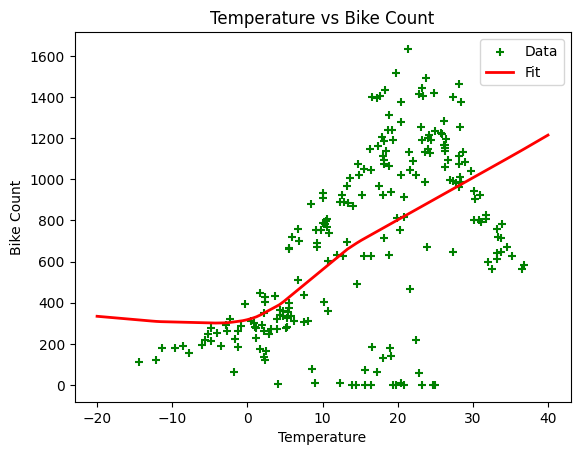

In [224]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

all normalizer

In [228]:
all_normalizer = tf.keras.layers.Normalization(input_shape=[6], axis=-1) #The input_shape was changed from [6,1] to [6].
all_normalizer.adapt(X_train_all)

In [229]:
nn_model = tf.keras.Sequential(
    [
        all_normalizer,
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1),
    ]
)
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
)

In [230]:
history = nn_model.fit(
    X_train_all,
    y_train_all,
    epochs=100,
    verbose=0,
    validation_data=(X_valid_all, y_valid_all)
)

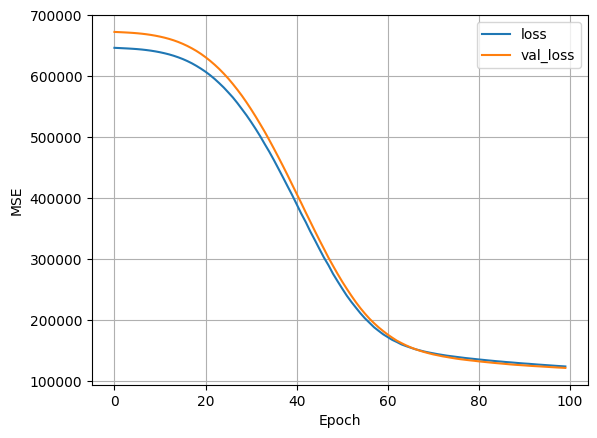

In [231]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


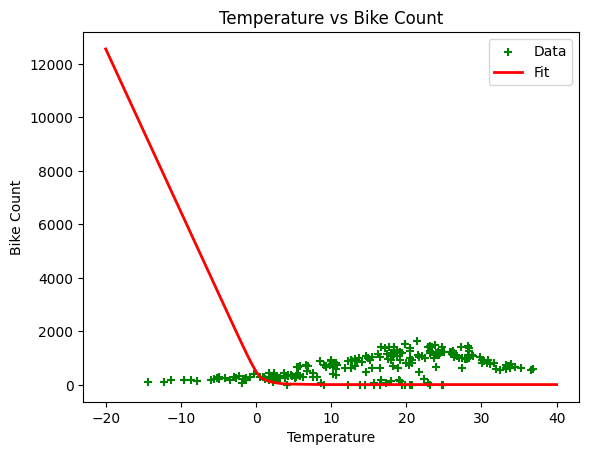

In [232]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [233]:
all_regressor.score(X_train_all, y_train_all)

0.4693784186541857

In [235]:
y_pred_regression = all_regressor.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [239]:
# print(type(y_pred_regression))
# print(type(y_pred_nn))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [236]:
def mse_calculate(y_pred, y_real) -> float:
  return (np.square(y_pred - y_real)).mean()

In [237]:
mse_calculate(y_pred_regression, y_test_all)

85784.56905270899

In [238]:
mse_calculate(y_pred_nn, y_test_all)

98904.7605481422

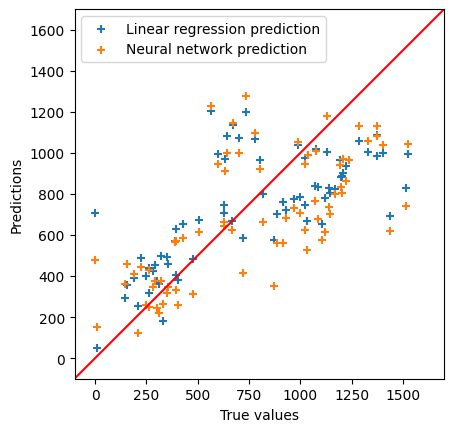

In [247]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_regression, label='Linear regression prediction', marker='+')
plt.scatter(y_test_all, y_pred_nn, label='Neural network prediction', marker='+')
plt.xlabel('True values')
plt.ylabel('Predictions')
lims = [-100, 1700]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')